# Singular Value Decomposition

In [19]:
import cv2
import numpy as np

im = cv2.imread('/content/KakaoTalk_20210512_010144452.jpg')

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

cv2.imwrite('/content/KakaoTalk_20210512_010144452.jpg', im_gray)


True

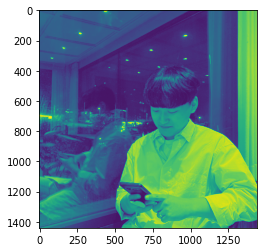

In [20]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

# Read image
im = pilimg.open('/content/KakaoTalk_20210512_010144452.jpg')
 
# Display image

# Fetch image pixel data to numpy array
pix = np.array(im)

plt.imshow(im)

In [21]:
pix.shape

(1440, 1440)

In [42]:
from numpy.linalg import svd

U, s, V = svd(pix, full_matrices=True)

print(U.shape)
print(s.shape)
print(V.shape)
s

(1440, 1440)
(1440,)
(1440, 1440)


array([1.63856644e+05, 4.40120656e+04, 2.12265363e+04, ...,
       4.63264791e-01, 3.42340091e-01, 4.47022578e-02])

In [43]:
len(s)

1440

In [44]:
S = np.zeros((1440, 1440))

for i in range(len(S)):
  for j in range(len(S[i])):
    if i == j:
      S[i][j] = s[i]

In [45]:
pix_A = np.dot(U, np.dot(S,V))

In [46]:
pix_A.shape

(1440, 1440)

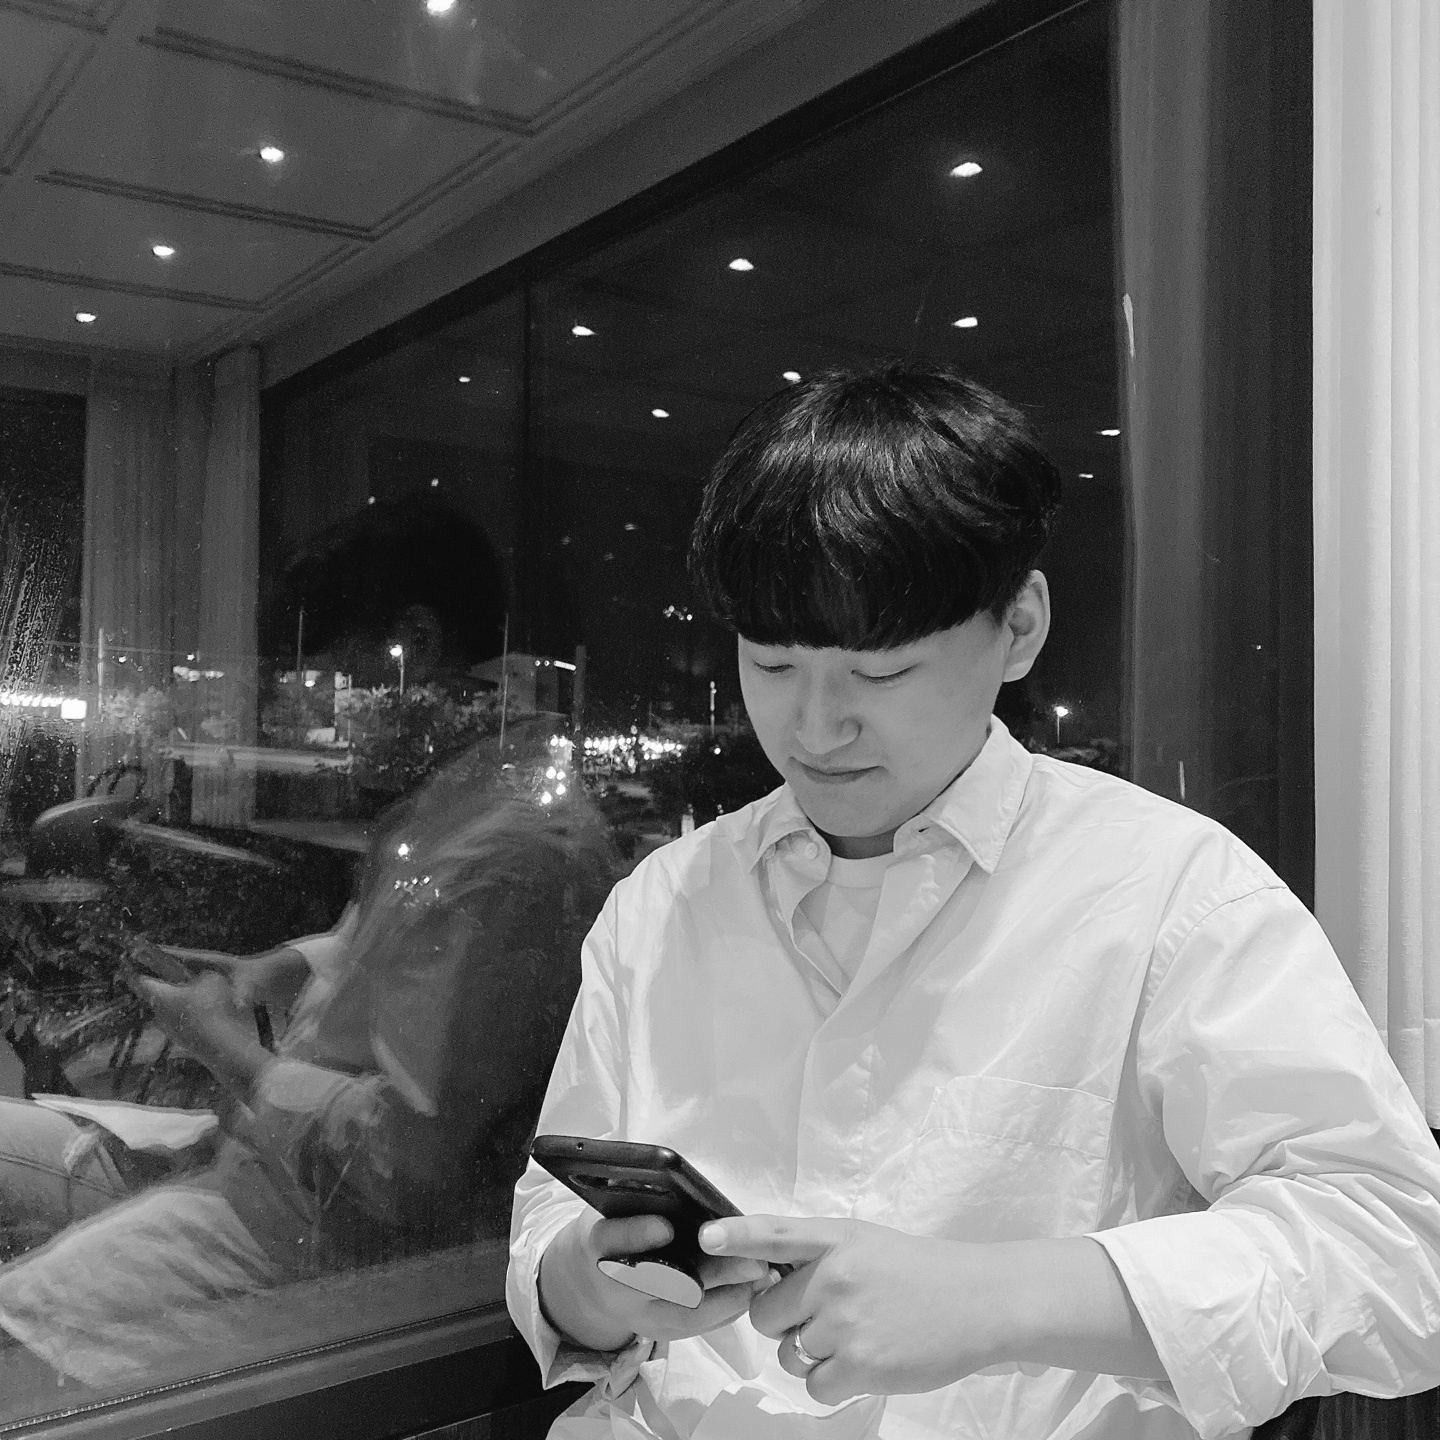

In [47]:
from PIL import Image 

image = Image.fromarray(np.uint8(pix_A))
image

In [48]:
s

array([1.63856644e+05, 4.40120656e+04, 2.12265363e+04, ...,
       4.63264791e-01, 3.42340091e-01, 4.47022578e-02])

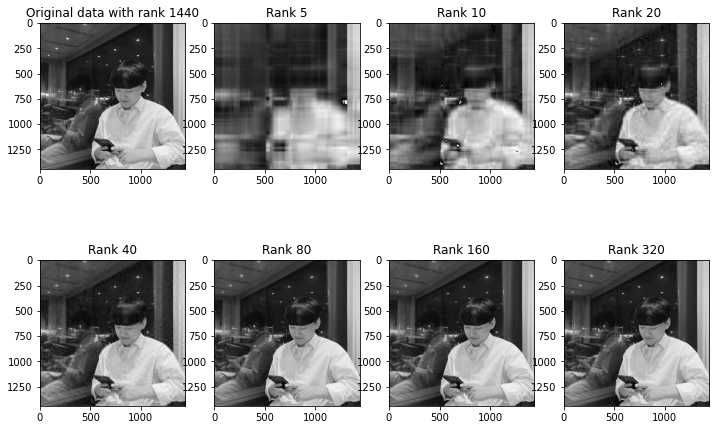

In [53]:
import matplotlib.pyplot as plt
import copy
fig = plt.figure(figsize = (12, 8))

k = [0, 5, 10, 20, 40, 80, 160, 320]
axes = []
for h in range(len(k)):
  S = np.zeros((1440, 1440))
  singular_value = copy.deepcopy(s)

  if k[h] == 0:
    pass
  else:
    singular_value[k[h]:] = 0
  
  for i in range(len(S)):
    for j in range(len(S[i])):
      if i == j:
        S[i][j] = singular_value[i]


  pix_A = np.dot(U, np.dot(S,V))
  image = Image.fromarray(np.uint8(pix_A))
  axes.append(fig.add_subplot(2, 4, h+1))

  if k[h] == 0:
    subplot_title = ("Original data with rank 1440")
  else:
    subplot_title = ("Rank {}".format(k[h]))
  axes[-1].set_title(subplot_title)
  plt.imshow(image, cmap = "gray")

plt.show()

# K - divergence and caculating norm

In [ ]:
import math
import numpy as np
def inner_product(a, b):
  return np.dot(a, b)

옥천 = [64, 71, 23, 25, 67, 219, 597, 498, 200, 4, 4]
동이 = [64, 76, 20, 18, 71, 176, 491, 443, 180, 1, 4]
안남 = [63, 72, 19, 30, 73, 184, 480, 388, 187, 1, 5]
안내 = [63, 72, 19, 30, 73, 184, 480, 388, 187, 1, 5]
청성 = [63, 73, 20, 20, 77, 190, 506, 396, 156, 2, 4]
청산 = [59, 66, 17, 19, 64, 176, 436, 359, 156, 2, 4]
이원 = [69, 74, 18, 21, 69, 185, 525, 443, 180, 1, 4]
군서 = [41, 63, 16, 21, 70, 183, 518, 385, 191, 1, 3]
군북 = [70, 86, 22, 23, 87, 224, 641, 375, 192, 2, 4]

print(sum)
def cos_norm(x, y):
  sum = 0
  return 1 - inner_product(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def l1_norm(x, y):
  sum = 0
  for k in range(len(x)):
    sum += abs(x[k] - y[k])
  return sum

name_list = [옥천, 동이, 안남, 안내, 청성, 청산, 이원, 군서, 군북]

for i in range(9):
  for j in range(9):
    sum[i][j] = cos_norm(name_list[i], name_list[j])

sum 

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[ 0.00000000e+00,  1.36164109e-03,  1.83461806e-03,
         1.83461806e-03,  1.36483429e-03,  1.17436160e-03,
         4.40426484e-04,  2.29881683e-03,  1.24395118e-02],
       [ 1.36164109e-03,  1.11022302e-16,  2.15165257e-03,
         2.15165257e-03,  2.87847946e-03,  1.69496473e-03,
         5.71323554e-04,  4.75135415e-03,  1.82128222e-02],
       [ 1.83461806e-03,  2.15165257e-03, -2.22044605e-16,
        -2.22044605e-16,  1.63467668e-03,  5.02205668e-04,
         1.34917619e-03,  1.66021745e-03,  1.02683596e-02],
       [ 1.83461806e-03,  2.15165257e-03, -2.22044605e-16,
        -2.22044605e-16,  1.63467668e-03,  5.02205668e-04,
         1.34917619e-03,  1.66021745e-03,  1.02683596e-02],
       [ 1.36483429e-03,  2.87847946e-03,  1.63467668e-03,
         1.63467668e-03,  1.11022302e-16,  8.04277228e-04,
         1.20518515e-03,  2.18312603e-03,  7.73204051e-03],
       [ 1.17436160e-03,  1.69496473e-03,  5.02205668e-04,
         5.02205668e-04,  8.04277228e-04, -2.220446

In [ ]:
A = [64, 71, 23, 25, 67, 219, 597, 498, 200, 4, 4]
B = [59, 66, 17, 19, 64, 176, 436, 359, 156, 2, 4]
C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(np.matmul(A, A))
print(np.matmul(B, B))
print(np.sum(A))
print(np.sum(B))
print(inner_product(A, A) / (np.sqrt(np.dot(A, A)) * np.sqrt(np.dot(A, A))))

707186
386892
1772
1358
1.0


In [ ]:
sentence = ["A girl is styling her hair",
            "A group of men play soccer on the beach",
            "One woman is measuring another woman`s ankle",
            "A man is cutting up a cucumber",
            "A man is playing a harp",
            "A girl is brushing her hair",
            "A group of boys are playing soccer on the beach",
            "A woman measures another woman`s ankle",
            "A man is slicing a cucumber",
            "A man is playing a keyboard"]


In [ ]:
word_list = []
for i in range(len(sentence)):
  word_list.append(sentence[i].split(" "))
word_list

[['A', 'girl', 'is', 'styling', 'her', 'hair'],
 ['A', 'group', 'of', 'men', 'play', 'soccer', 'on', 'the', 'beach'],
 ['One', 'woman', 'is', 'measuring', 'another', 'woman`s', 'ankle'],
 ['A', 'man', 'is', 'cutting', 'up', 'a', 'cucumber'],
 ['A', 'man', 'is', 'playing', 'a', 'harp'],
 ['A', 'girl', 'is', 'brushing', 'her', 'hair'],
 ['A',
  'group',
  'of',
  'boys',
  'are',
  'playing',
  'soccer',
  'on',
  'the',
  'beach'],
 ['A', 'woman', 'measures', 'another', 'woman`s', 'ankle'],
 ['A', 'man', 'is', 'slicing', 'a', 'cucumber'],
 ['A', 'man', 'is', 'playing', 'a', 'keyboard']]

In [ ]:
word_list_set = []
for i in range(len(word_list)):
  for j in range(len(word_list[i])):
    if word_list[i][j] not in word_list_set:
      word_list_set.append(word_list[i][j])
    else:
      pass

word_list_set

['A',
 'girl',
 'is',
 'styling',
 'her',
 'hair',
 'group',
 'of',
 'men',
 'play',
 'soccer',
 'on',
 'the',
 'beach',
 'One',
 'woman',
 'measuring',
 'another',
 'woman`s',
 'ankle',
 'man',
 'cutting',
 'up',
 'a',
 'cucumber',
 'playing',
 'harp',
 'brushing',
 'boys',
 'are',
 'measures',
 'slicing',
 'keyboard']

In [ ]:
len(word_list_set)

33

In [ ]:
sen_matrix = np.zeros((10, 33))
for i in range(len(word_list)):
  for j in range(len(word_list[i])):
    for k in range(len(word_list_set)):
      if word_list_set[k] == word_list[i][j]:
        sen_matrix[i][k] = 1

sen_matrix = sen_matrix + 0.01

In [ ]:
print(sen_matrix[0])
print(np.sum(sen_matrix[0]))

[1.01 1.01 1.01 1.01 1.01 1.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01]
6.33


In [ ]:
for i in range(len(sen_matrix)):
  sen_matrix[i] = np.divide(sen_matrix[i], np.sum(sen_matrix[i]))

In [ ]:
KL_matrix = np.zeros((10, 10))

def KL_divergence(P, Q):
  sum = 0
  for i in range(len(P)):
    sum += P[i] * np.log(P[i] / Q[i])
  return sum

for i in range(10):
  for j in range(10):
    KL_matrix[i][j] = KL_divergence(sen_matrix[i], sen_matrix[j])

KL_matrix

array([[0.        , 4.01149702, 3.78481926, 3.05573229, 2.91634788,
        0.72908697, 4.10602342, 3.64543485, 2.91634788, 2.91634788],
       [3.58413572, 0.        , 4.22051832, 3.72586446, 3.58413572,
        3.58413572, 1.08617845, 3.58413572, 3.58413572, 3.58413572],
       [3.63734577, 4.63601273, 0.        , 3.77772484, 3.63734577,
        3.63734577, 4.73153379, 1.74848335, 3.63734577, 3.63734577],
       [3.00772496, 4.00639193, 3.77772484, 0.        , 1.74848335,
        3.00772496, 4.10191299, 3.63734577, 1.11886254, 1.74848335],
       [2.91634788, 4.01149702, 3.78481926, 1.59755835, 0.        ,
        2.91634788, 3.37693645, 3.64543485, 1.45817394, 0.72908697],
       [0.72908697, 4.01149702, 3.78481926, 3.05573229, 2.91634788,
        0.        , 4.10602342, 3.64543485, 2.91634788, 2.91634788],
       [3.54903687, 1.24295647, 4.13801314, 3.69124446, 3.10226818,
        3.54903687, 0.        , 3.54903687, 3.54903687, 3.10226818],
       [3.64543485, 4.01149702, 1.5975583

In [ ]:
sen_matrix

array([[0.15955766, 0.15955766, 0.15955766, 0.15955766, 0.15955766,
        0.15955766, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
        0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
        0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
        0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
        0.00157978, 0.00157978, 0.00157978, 0.00157978, 0.00157978,
        0.00157978, 0.00157978, 0.00157978],
       [0.10825295, 0.00107181, 0.00107181, 0.00107181, 0.00107181,
        0.00107181, 0.10825295, 0.10825295, 0.10825295, 0.10825295,
        0.10825295, 0.10825295, 0.10825295, 0.10825295, 0.00107181,
        0.00107181, 0.00107181, 0.00107181, 0.00107181, 0.00107181,
        0.00107181, 0.00107181, 0.00107181, 0.00107181, 0.00107181,
        0.00107181, 0.00107181, 0.00107181, 0.00107181, 0.00107181,
        0.00107181, 0.00107181, 0.00107181],
       [0.00136426, 0.00136426, 0.1377899 , 0.00136426, 0.00136426,
        0.00136426, 0.0013

In [ ]:
((9/10)**4 + 2 * (9/10)**3 + 190 * (1/100) * (9 / 10)**2 + 60*19*(1/1000)*(9/10) + 95*51*(1/10)**4) * (9/10) ** 16

0.9568255047155368

In [ ]:
import numpy as np

print(2 + 3*np.sqrt(1.8), 2 - 3*np.sqrt(1.8))

6.024922359499621 -2.0249223594996213
